In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
_dt = datetime.datetime
# define the function to change the format of date
def format_time(str_obj):
    return datetime.datetime.strptime(str_obj,"%m/%d/%Y %H:%M")

In [3]:
path = "/Users/yifuhe/Desktop/Yifu-He-final-exam/stock.csv"
data = pd.read_csv(path)
start = data[data["date"] == "2/2/2009 0:00"].index[0]
end = data[data["date"] == "6/30/2010 0:00"].index[0]
data = data.loc[start:end,:].reset_index().drop("index",axis=1)
data["date"]=data["date"].apply(format_time)
data["20 days"]=data["AA"].rolling(20).mean()
data["50 days"]=data["AA"].rolling(50).mean()
data["200 days"] = data["AA"].rolling(200).mean()
new_data = data.rename(columns={"AA":"Daily"})
new_data

,date,Daily,20 days,50 days,200 days
0,2009-02-02,7.36,NaN,NaN,NaN
1,2009-02-03,7.69,NaN,NaN,NaN
2,2009-02-04,7.64,NaN,NaN,NaN
3,2009-02-05,7.88,NaN,NaN,NaN
4,2009-02-06,8.21,NaN,NaN,NaN
...,...,...,...,...,...
351,2010-06-24,10.99,11.1420,12.0036,13.31720
352,2010-06-25,11.11,11.1125,11.9432,13.30980
353,2010-06-28,10.91,11.0820,11.8868,13.30125
354,2010-06-29,10.23,11.0400,11.8206,13.28855


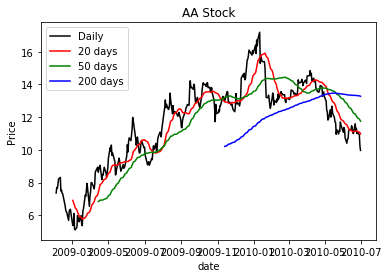

In [5]:
plt.plot(data["date"],new_data["Daily"],color = "black",label="Daily")
plt.plot(data["date"],data["20 days"],color = "red",label="20 days")
plt.plot(data["date"],data["50 days"],color = "green",label = "50 days")
plt.plot(data["date"],data["200 days"],color = "blue",label="200 days")
plt.title("AA Stock")
plt.xlabel("date")
plt.ylabel("Price")
plt.legend(loc = "upper left")
#my_x_ticks = [_dt(2009,i,1) for i in range(3,12,2)]+[_dt(2010,i,1) for i in range(1,6,2)]
#plt.xticks(my_x_ticks,rotation = 45)
#plt.xlim(("2019.03","2010.05"))
plt.show()